### Quotes to Scrape
- Link: https://quotes.toscrape.com
- Pages: 1 till 10

### Data Scraping

In [1]:
# pip install requests

Note: you may need to restart the kernel to use updated packages.


Link: https://pypi.org/project/requests/

In [1]:
import requests

In [2]:
r = requests.get('https://quotes.toscrape.com/page/1/')
print(r.status_code)

200


##### meaning of response as '200' from server
- check the link: https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

In [3]:
# r = requests.get('https://quotes.toscrape.com/page/1/')
html = r.text
for line in html.split('\n'):
    print(line)
    print('------------------')

<!DOCTYPE html>
------------------
<html lang="en">
------------------
<head>
------------------
	<meta charset="UTF-8">
------------------
	<title>Quotes to Scrape</title>
------------------
    <link rel="stylesheet" href="/static/bootstrap.min.css">
------------------
    <link rel="stylesheet" href="/static/main.css">
------------------
</head>
------------------
<body>
------------------
    <div class="container">
------------------
        <div class="row header-box">
------------------
            <div class="col-md-8">
------------------
                <h1>
------------------
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
------------------
                </h1>
------------------
            </div>
------------------
            <div class="col-md-4">
------------------
                <p>
------------------
                
------------------
                    <a href="/login">Login</a>
------------------
                
--------------

**As want to extract the author,quotes for all web pages from the concerend website**

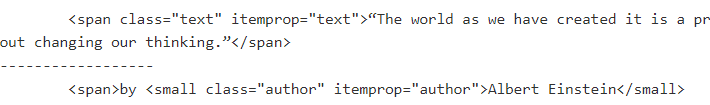

- `the above line will help us out`

**Quotes**
- \<span class="text" itemprop="text">“
- ”\</span>

**Author**
- \<span>by \<small class="author" itemprop="author">
- \</small>

In [4]:
for i in range(1,11):
    print('Page:',i)
    print('*********************')
    url = f'https://quotes.toscrape.com/page/{i}/'
    response = requests.get(url)
    html = response.text
    for line in html.split('\n'):
        if '<span class="text" itemprop="text">' in line:
            line = line.replace('<span class="text" itemprop="text">“','')
            line = line.replace('”</span>','')
            quote = line.strip()
        if '<small class="author" itemprop="author">' in line:
            line = line.replace('<span>by <small class="author" itemprop="author">','')
            line = line.replace('</small>','')
            author = line.strip()
            
            print(author+","+quote)
            print('-----------------')

Page: 1
*********************
Albert Einstein,The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.
-----------------
J.K. Rowling,It is our choices, Harry, that show what we truly are, far more than our abilities.
-----------------
Albert Einstein,There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.
-----------------
Jane Austen,The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.
-----------------
Marilyn Monroe,Imperfection is beauty, madness is genius and it&#39;s better to be absolutely ridiculous than absolutely boring.
-----------------
Albert Einstein,Try not to become a man of success. Rather become a man of value.
-----------------
André Gide,It is better to be hated for what you are than to be loved for what you are not.
-----------------
Thomas A. Edison,I have not failed. I&#39;ve just fou

Jane Austen,There is nothing I would not do for those who are really my friends. I have no notion of loving people by halves, it is not my nature.
-----------------
Eleanor Roosevelt,Do one thing every day that scares you.
-----------------
Marilyn Monroe,I am good, but not an angel. I do sin, but I am not the devil. I am just a small girl in a big world trying to find someone to love.
-----------------
Albert Einstein,If I were not a physicist, I would probably be a musician. I often think in music. I live my daydreams in music. I see my life in terms of music.
-----------------
Haruki Murakami,If you only read the books that everyone else is reading, you can only think what everyone else is thinking.
-----------------
Alexandre Dumas fils,The difference between genius and stupidity is: genius has its limits.
-----------------
Stephenie Meyer,He&#39;s like a drug for you, Bella.
-----------------
Ernest Hemingway,There is no friend as loyal as a book.
-----------------
Helen Keller,Wh

### Lets store the text in csv file

In [5]:
for i in range(1,11):
    print('Page:',i)
    url = f'https://quotes.toscrape.com/page/{i}/'
    response = requests.get(url)
    html = response.text
    with open('authors&quotes.csv','a',encoding='utf-8') as f:
        for line in html.split('\n'):
            if '<span class="text" itemprop="text">' in line:
                line = line.replace('<span class="text" itemprop="text">“','')
                line = line.replace('”</span>','')
                quote = line.strip()
            if '<small class="author" itemprop="author">' in line:
                line = line.replace('<span>by <small class="author" itemprop="author">','')
                line = line.replace('</small>','')
                author = line.strip()
                
                f.write(author+","+quote)
                f.write('\n')
print('Author and Quotes are Scrapped Successfuly \:)')

Page: 1
Page: 2
Page: 3
Page: 4
Page: 5
Page: 6
Page: 7
Page: 8
Page: 9
Page: 10
Author and Quotes are Scrapped Successfuly \:)


**The END**